In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10, activation='sigmoid')
      ])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 114s 72ms/step - loss: 1.8112 - accuracy: 0.3542
Epoch 2/10
1563/1563 [==============================] - 110s 71ms/step - loss: 1.6239 - accuracy: 0.4259
Epoch 3/10
  36/1563 [..............................] - ETA: 1:52 - loss: 1.5684 - accuracy: 0.4340

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [12]:
cnn = models.Sequential([
        #cnn layers
        layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        #dense layers
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10, activation='softmax')
      ])

In [13]:
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4967 - accuracy: 0.4639
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2129 - accuracy: 0.5715
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0743 - accuracy: 0.6235
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9741 - accuracy: 0.6593
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8990 - accuracy: 0.6849
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8352 - accuracy: 0.7078
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7803 - accuracy: 0.7255
Epoch 8/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.7252 - accuracy: 0.7460
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6751 - accuracy: 0.7631
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_test = y_test.reshape(-1,)

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [18]:
#prediction time
y_pred = cnn.predict(X_test)

prediksi =[np.argmax(kelas) for kelas in y_pred]

Prediction Result is:
cat


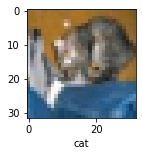

In [19]:
#Prediksi Benar
test_id = 0
plot_sample(X_test, y_test,test_id)
print("Prediction Result is:")
print(classes[prediksi[test_id]])
print("============================")

Prediction Result is:
frog


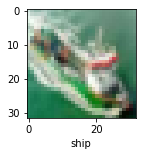

In [34]:
#Prediksi Salah
test_id = 15
plot_sample(X_test, y_test,test_id)
print("Prediction Result is:")
print(classes[prediksi[test_id]])
print("============================")

In [15]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                401472    
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 404,554
Trainable params: 404,554
Non-trainable params: 0
________________________________________________